In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [5]:
data.describe()


,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
from sklearn import svm 
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split


In [7]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [8]:
bins = (-1 , 0,1,2,3,4,5)
health = ['malnourished' , 'underweight' , 'fit', 'slightly overweight' , 'overweight' , 'extremely overweight']
data['Index'] = pd.cut(data['Index'], bins= bins , labels=health)
data['Index']

0                overweight
1                       fit
2                overweight
3       slightly overweight
4       slightly overweight
               ...         
495    extremely overweight
496              overweight
497    extremely overweight
498    extremely overweight
499    extremely overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extremely overweight']

In [9]:
data['Index'].head()

0             overweight
1                    fit
2             overweight
3    slightly overweight
4    slightly overweight
Name: Index, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extremely overweight']

In [10]:
data['Index'].count()


500

In [11]:
data['Index'].value_counts()

extremely overweight    198
overweight              130
fit                      69
slightly overweight      68
underweight              22
malnourished             13
Name: Index, dtype: int64

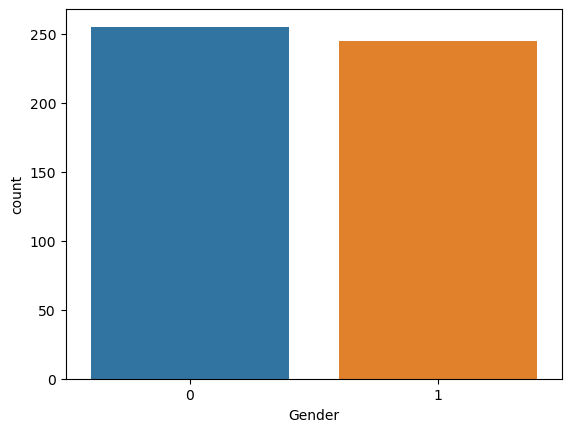

In [19]:
sns.countplot(x = 'Gender',data = data)
plt.show()

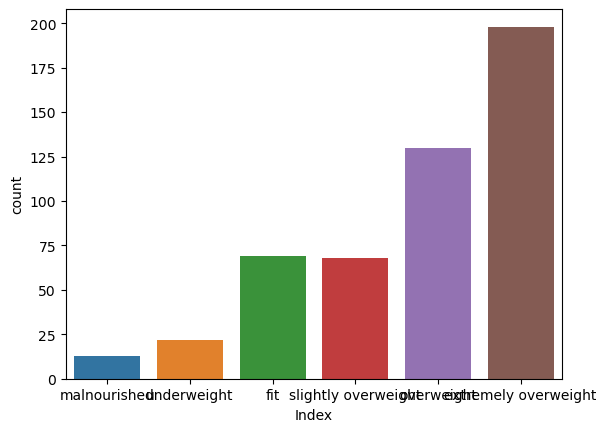

In [20]:
sns.countplot(x = 'Index',data = data)
plt.show()

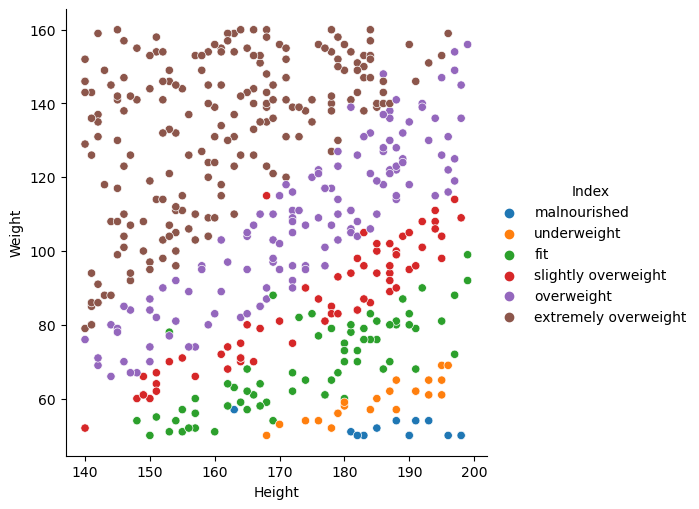

In [23]:
sns.relplot(x="Height" , y ="Weight" , hue="Index" , data=data)
plt.show()

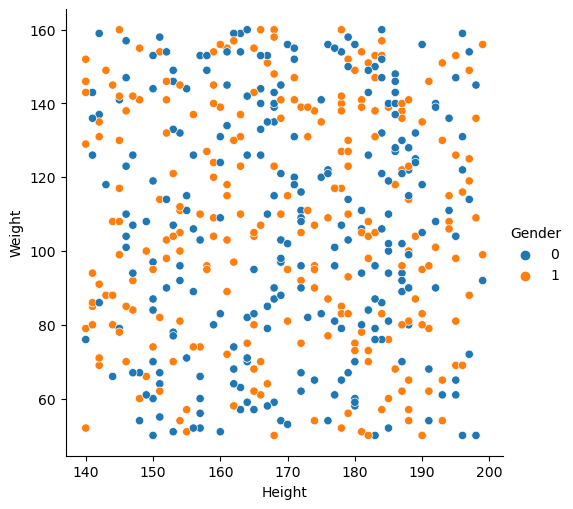

In [24]:
sns.relplot(x="Height" , y ="Weight" , hue="Gender" , data=data)
plt.show()

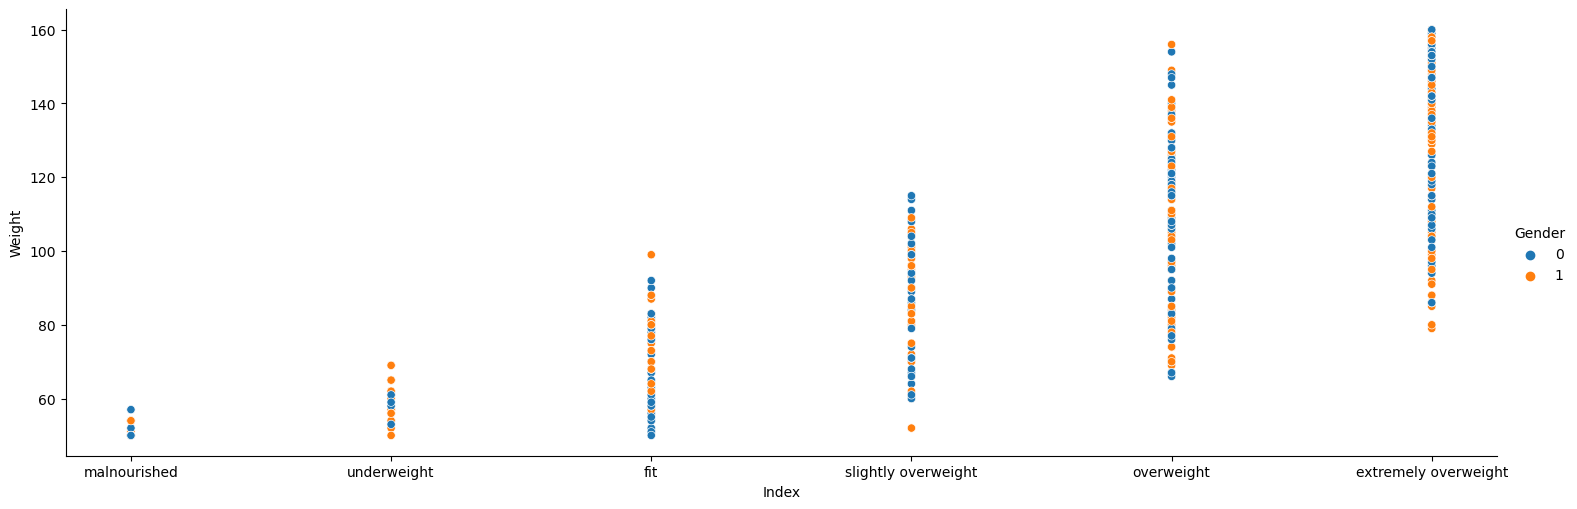

In [25]:
sns.relplot(x="Index" , y ="Weight" , hue="Gender" , data=data , height=5 , aspect=3)
plt.show()

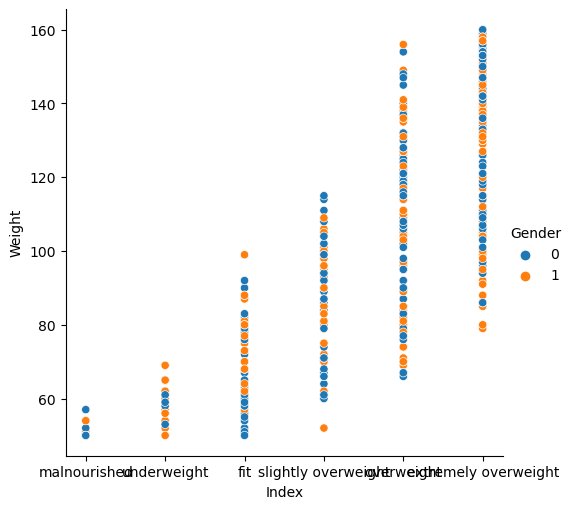

In [26]:
sns.relplot(x="Index" , y ="Weight" , hue="Gender" , data=data )
plt.show()

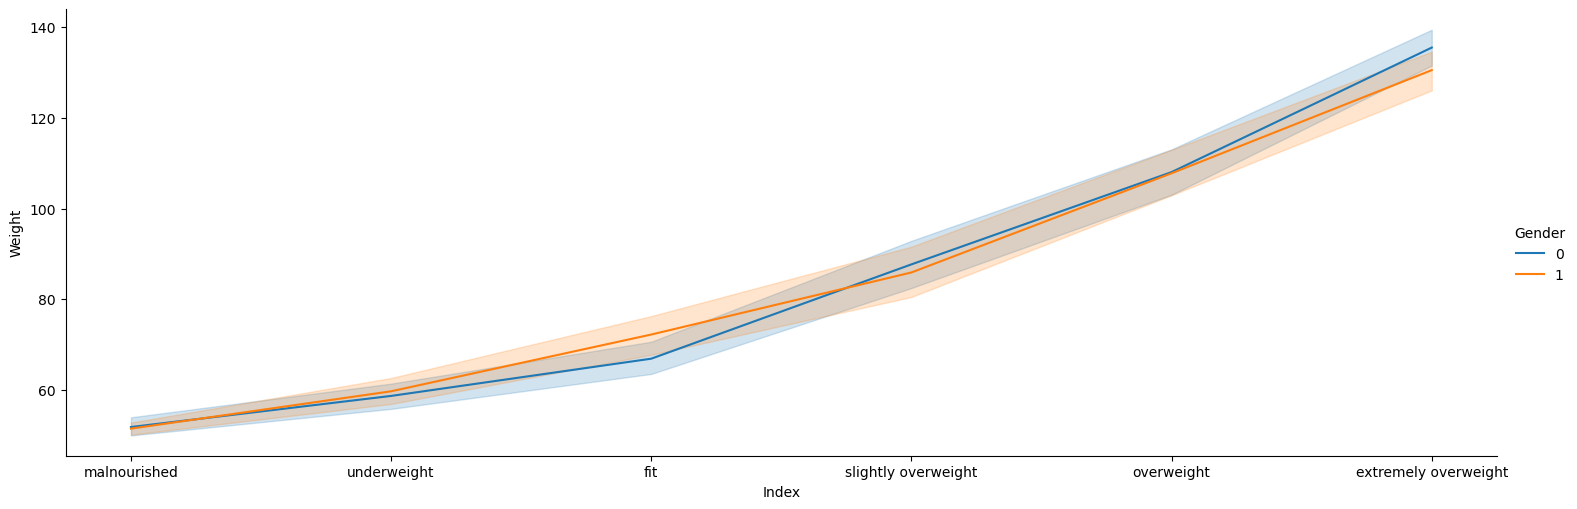

In [27]:
sns.relplot(x="Index" , y="Weight" , hue="Gender" , kind='line' , data=data , height=5 , aspect=3)
plt.show()

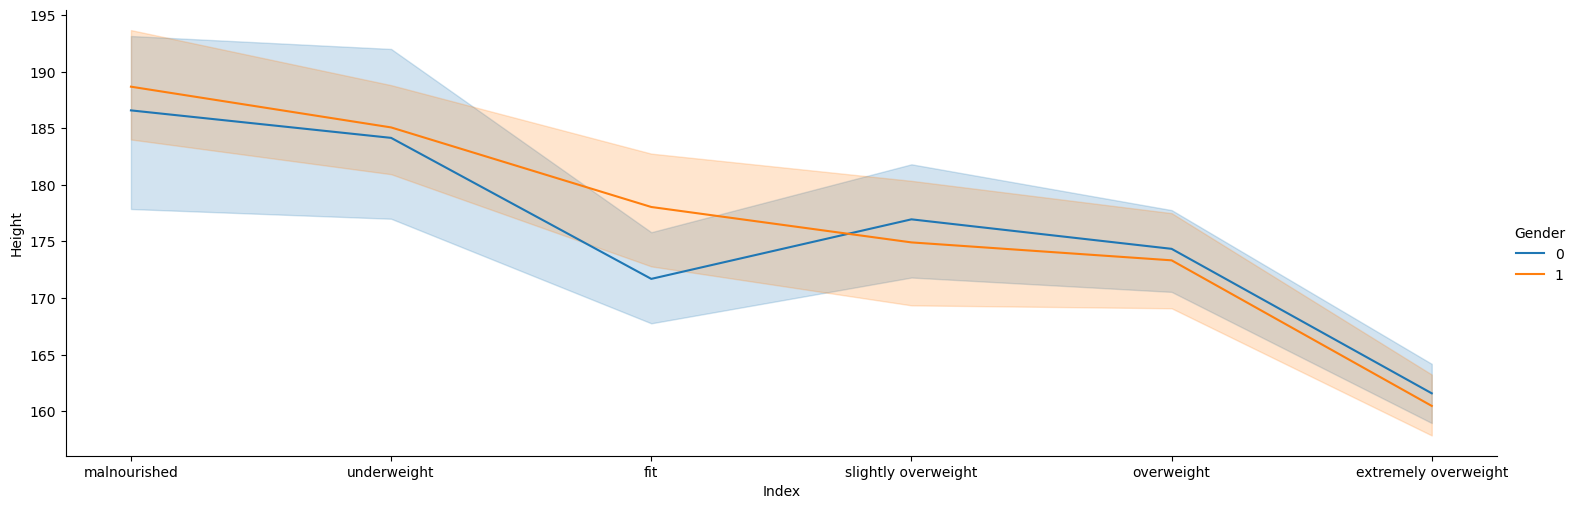

In [28]:
sns.relplot(x="Index" , y="Height" , hue="Gender" , kind='line' , data=data , height=5 , aspect=3)
plt.show()

In [29]:
x = data.drop('Index' , axis=1)
y = data['Index']

In [30]:
x_train , x_test , y_train  , y_test = train_test_split( x,y,test_size=0.1 , random_state=10)

In [31]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [32]:
clf = svm.SVC()
clf.fit(x_train , y_train)
pred = clf.predict(x_test)


In [33]:
print(classification_report(y_test , pred))


                      precision    recall  f1-score   support

extremely overweight       0.96      0.96      0.96        23
                 fit       0.67      1.00      0.80         6
          overweight       0.75      0.90      0.82        10
 slightly overweight       1.00      0.38      0.55         8
         underweight       1.00      1.00      1.00         3

            accuracy                           0.86        50
           macro avg       0.87      0.85      0.82        50
        weighted avg       0.89      0.86      0.85        50



In [34]:

print( confusion_matrix(y_test , pred))

[[22  0  1  0  0]
 [ 0  6  0  0  0]
 [ 1  0  9  0  0]
 [ 0  3  2  3  0]
 [ 0  0  0  0  3]]


In [35]:

print(accuracy_score(y_test , pred))

0.86


In [36]:
a = [[0,190,190]]  # female , height , weight
a = s.transform(a)
b = clf.predict(a)
b

array(['extremely overweight'], dtype=object)